# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1023.
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           4.27e-42
Time:                        15:24:56   Log-Likelihood:                 4.8000
No. Observations:                  50   AIC:                            -1.600
Df Residuals:                      46   BIC:                             6.048
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1297      0.078     65.669      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.65421947  5.13840838  5.58133205  5.95380087  6.23715962  6.42635244
  6.53075351  6.57262692  6.58346871  6.59883218  6.65248656  6.77086887
  6.96874034  7.24676119  7.5913822   7.97707075  8.37050581  8.73605245
  9.04161659  9.26391792  9.39231486  9.43055288  9.39614915  9.31751453
  9.22928573  9.1666346   9.15948951  9.22761818  9.37737991  9.60068077
  9.87630341 10.17339299 10.45652658 10.69153301 10.85110711 10.91929589
 10.89411955 10.78789675 10.62522072 10.43891862 10.26465817 10.13508752
 10.07447126 10.09470382 10.19335523 10.35407038 10.54925612 10.74461471
 10.90477886 10.99912247]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.99550472 10.85166016 10.58859293 10.25416875  9.9113958   9.62299803
  9.43605823  9.37049046  9.41416446  9.52587547]


## Plot comparison

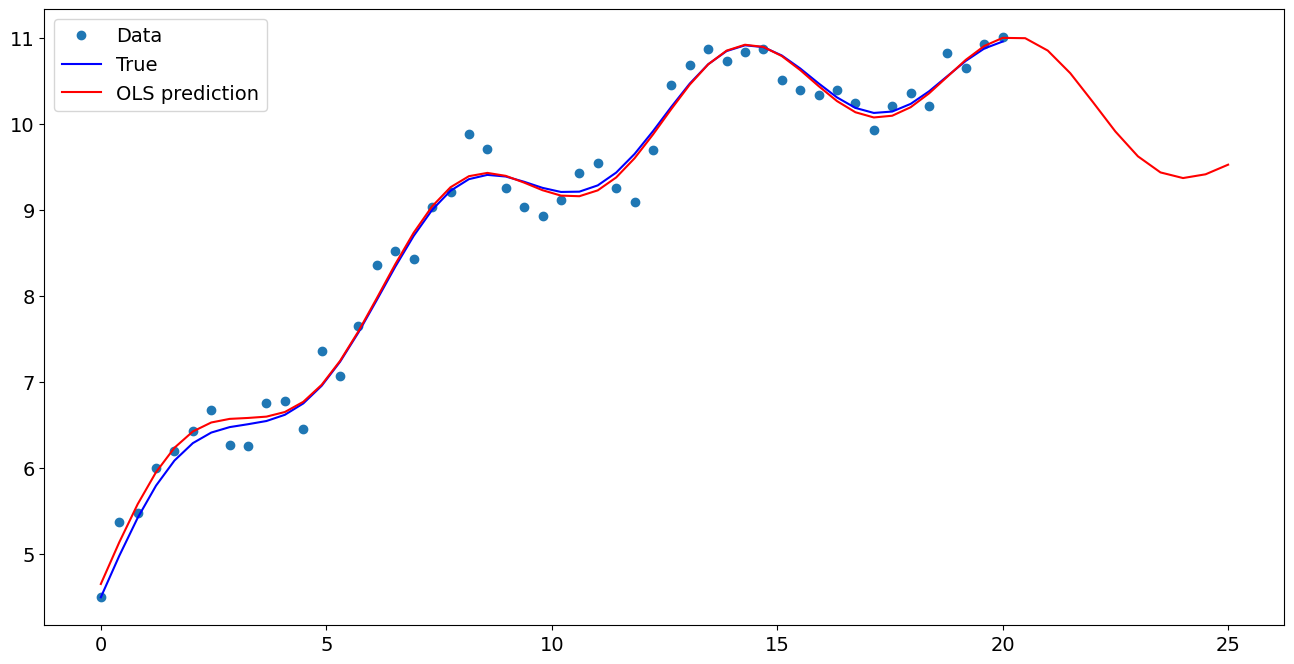

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.129694
x1                  0.482986
np.sin(x1)          0.535598
I((x1 - 5) ** 2)   -0.019019
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.995505
1    10.851660
2    10.588593
3    10.254169
4     9.911396
5     9.622998
6     9.436058
7     9.370490
8     9.414164
9     9.525875
dtype: float64